Columnas categóricas detectadas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'response']

Columnas no numéricas después de codificación: []

🔍 Clasificación (Regresión Logística):
Accuracy: 0.9985310319500551
Confusion Matrix:
 [[7158    8]
 [   4  999]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7166
           1       0.99      1.00      0.99      1003

    accuracy                           1.00      8169
   macro avg       1.00      1.00      1.00      8169
weighted avg       1.00      1.00      1.00      8169



c:\Users\Haine\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


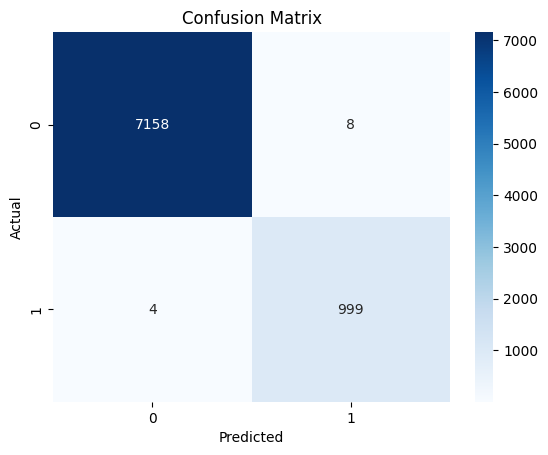

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 1. Cargar el archivo CSV
# =========================
df = pd.read_csv("C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Data\\bank_cleaned.csv")

# =========================
# 2. Preparar columnas categóricas
# =========================
# Detectar columnas categóricas (texto)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar columnas categóricas encontradas
print("Columnas categóricas detectadas:", cat_cols)

# Convertir a variables dummy (0/1), eliminar primera categoría para evitar colinealidad
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Verificar que no quedan columnas categóricas
print("\nColumnas no numéricas después de codificación:", df.select_dtypes(include='object').columns.tolist())


# =========================
# 3. Clasificación: Predecir 'response_binary'
# =========================
if 'response_binary' in df.columns:
    X = df.drop(columns=['response_binary'])
    y = df['response_binary']

    # División entrenamiento / prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenar modelo
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluación
    print("\n🔍 Clasificación (Regresión Logística):")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Visualización de la matriz de confusión
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

   

In [2]:
 import joblib

# Guardar el model en fitxer .pkl
joblib.dump(model, "modelo_clasificacion.pkl")
print("✅ Model de classificació desat com a modelo_clasificacion.pkl")

✅ Model de classificació desat com a modelo_clasificacion.pkl


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

# Cargar datos (ajusta la ruta a tu archivo)
df = pd.read_csv("C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Data\\ranking_clientes.csv")

# Definir variables predictoras y objetivo
X = df.drop(columns=["duration"])
y = df["duration"]

# Codificar variables categóricas con get_dummies
X_encoded = pd.get_dummies(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Evaluar
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"📉 MSE: {mse:.2f}")

# Guardar modelo y columnas
modelo.feature_names_in_ = X_encoded.columns  # importante para usarlo luego
joblib.dump(modelo, "modelo_regresion.pkl")


📉 MSE: 10.76


['modelo_regresion.pkl']

In [4]:
import joblib
# Guardar el model en fitxer .pkl
joblib.dump(modelo, "modelo_regresion.pkl")
print("✅ Model de regressió desat com a modelo_regresion.pkl")


✅ Model de regressió desat com a modelo_regresion.pkl
